In [0]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# keys and tokens from the Twitter Dev Console 
consumer_key = 'hPqpFHUmHj7yrSM8K7eUfpGC2'
consumer_secret = 'Ik8yFke3RVsOB2QCErVcpPtuz1N2lYrCrGRqGPvyu9Ojo92Ff1'
access_token = '1189202294379663360-1JlUHf2V6PaOFO1H67zqH2pEQ4OuN9'
access_token_secret = 'lrsbkHEEYTqFnLNc2OyUeGkO1z1vMzXdZtaIrh4Z3783D'

In [0]:
# create OAuthHandler object 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# set access token and secret 
auth.set_access_token(access_token, access_token_secret) 
# create tweepy API object to fetch tweets 
api = tweepy.API(auth) 

In [0]:
#Extract 200 tweets from user
posts= api.user_timeline(screen_name= 'elonmusk', count= 1000, lang= 'English', tweet_mode= 'extended')

#Print the last 5 tweets from the account
print('Show five recent tweets: \n')
i= 1
for tweet in posts[0:6]:
  print(str(i) + '. '+ tweet.full_text + '\n')
  i = i+1

Show five recent tweets: 

1. @SciGuySpace 💕

2. @justpaulinelol @Erdayastronaut @Sofiaan @Tesla We’re making progress. Improved rules are going through the EU standards committees. Hopefully better in a few months.

3. @Erdayastronaut @Sofiaan @Tesla Cool, we’re tracking to release more FSD features later this month

4. @Sofiaan @Tesla True. Oddly, those who complained didn’t actually order FSD. Perhaps they weren’t aware that the computer is upgraded for free if the FSD option is ordered even after delivery.

5. RT @Teslarati: Tesla rolls out "range update" for Model S, Model X display to reflect improved efficiency. Model X shows a whopping 354 mil…

6. Mad respect for the makers of things



In [0]:
#Create a dataframe with a column called Tweets
df= pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#show first five
df.head()

,Tweets
0,@SciGuySpace 💕
1,@justpaulinelol @Erdayastronaut @Sofiaan @Tesl...
2,"@Erdayastronaut @Sofiaan @Tesla Cool, we’re tr..."
3,"@Sofiaan @Tesla True. Oddly, those who complai..."
4,"RT @Teslarati: Tesla rolls out ""range update"" ..."


In [0]:
#Clean the text
#fuNC: clean the tweets
def clean_text(text):
  text= re.sub(r'@[A-Za-z0-9]+', '', text)
  text= re.sub(r'#', '', text)
  text= re.sub(r'RT[\s]+', '', text)
  text= re.sub(r'https://\S+', '', text)
  return text

df['Tweets']= df['Tweets'].apply(clean_text)

#show cleaned texts
df

,Tweets
0,💕
1,We’re making progress. Improved rules are ...
2,"Cool, we’re tracking to release more FSD fe..."
3,"True. Oddly, those who complained didn’t act..."
4,": Tesla rolls out ""range update"" for Model S, ..."
...,...
195,New fins
196,Rococo basilisk
197,REALiTi made while u wait
198,


In [0]:
#create a function to get the subjectivity
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

#subjectivity and polarity columns
df['Subjectivity']= df['Tweets'].apply(get_subjectivity)
df['Polarity']= df['Tweets'].apply(get_polarity)

#show df
df

,Tweets,Subjectivity,Polarity
0,💕,0.000000,0.000000
1,We’re making progress. Improved rules are ...,0.300000,0.150000
2,"Cool, we’re tracking to release more FSD fe...",0.383333,0.283333
3,"True. Oddly, those who complained didn’t act...",0.375000,0.088889
4,": Tesla rolls out ""range update"" for Model S, ...",0.000000,0.000000
...,...,...,...
195,New fins,0.454545,0.136364
196,Rococo basilisk,0.000000,0.000000
197,REALiTi made while u wait,0.000000,0.000000
198,,0.000000,0.000000


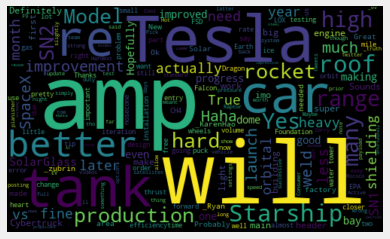

In [0]:
#wordcloud/textcloud for visualisation
#plot wordcloud
all_words= ' '.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width= 500, height= 300, random_state= 21, max_font_size= 120).generate(all_words)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [0]:
#create a function the negative and neutral and positive analysis
def get_analysis(score):
  if score<0:
    return 'Negative'
  if score== 0:
    return 'Neutral'
  if score> 0:
    return 'Positive'

df['Analysis']= df['Polarity'].apply(get_analysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,💕,0.000000,0.000000,Neutral
1,We’re making progress. Improved rules are ...,0.300000,0.150000,Positive
2,"Cool, we’re tracking to release more FSD fe...",0.383333,0.283333,Positive
3,"True. Oddly, those who complained didn’t act...",0.375000,0.088889,Positive
4,": Tesla rolls out ""range update"" for Model S, ...",0.000000,0.000000,Neutral
...,...,...,...,...
195,New fins,0.454545,0.136364,Positive
196,Rococo basilisk,0.000000,0.000000,Neutral
197,REALiTi made while u wait,0.000000,0.000000,Neutral
198,,0.000000,0.000000,Neutral


In [0]:
#print all of the positive tweets
j=1
sorted_DF= df.sort_values(by=['Polarity'])
for i in range (0, sorted_DF.shape[0]):
  if (sorted_DF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' +sorted_DF['Tweets'][i])
    print()
    j= j+1

1)     We’re making progress. Improved rules are going through the EU standards committees. Hopefully better in a few months.

2)    Cool, we’re tracking to release more FSD features later this month

3)   True. Oddly, those who complained didn’t actually order FSD. Perhaps they weren’t aware that the computer is upgraded for free if the FSD option is ordered even after delivery.

4) Bernie’s tax rate is 0.2% too high! 

5)  No matter what, we need to pressurize the production system. Rocket design is relatively easy, making one is hard, making many is extremely hard. Manufacturing is underrated.

6) Sleeving SN2 dome in the high bay 

7) They have the best coin

8)  Track mode V2 is pretty cool. Maybe too complicated to use though? Lmk thoughts for improvement.

9)   This is vital

10) Just want say that I support  as Twitter CEO. He has a good ❤️.

11) : Your Cybertruck is here. It's just ... a toy. The Hot Wheels Tesla Cybertruck goes 25 miles per hour and accelerates like a demo…



In [0]:
#print all of the negative tweets
j=1
sorted_DF= df.sort_values(by=['Polarity'], ascending= 'False')
for i in range (0, sorted_DF.shape[0]):
  if (sorted_DF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' +sorted_DF['Tweets'][i])
    print()
    j= j+1

1) Mad respect for the makers of things

2)  There’s a puck at the base that takes the engine thrust load. Don’t shuck the puck!

3) : Falcon Heavy will launch ! The mission, for which  requires the highest level of launch vehicle reliability, wi…

4) _  The competitor should be a drone fighter plane that’s remote controlled by a human, but with its maneuvers augmented by autonomy. The F-35 would have no chance against it.

5)   Full disclosure, I’m actually a 3000 year old vampire. It’s such a trial assuming all these false identities over the centuries!

6)    Yes, will also show real-time changes to max acceleration, braking, cornering, speed on gradient &amp; range, latter factoring in route elevation changes &amp; cargo or tow mass &amp; drag impact

7)  Btw, in some prior tweets I’d said production Cybertruck would be ~80” wide (vs ~84” body width at unveil). This is slightly too small. Will be closer to 82”, but come standard with upper laser blade lights.

8)  Active ride heigh

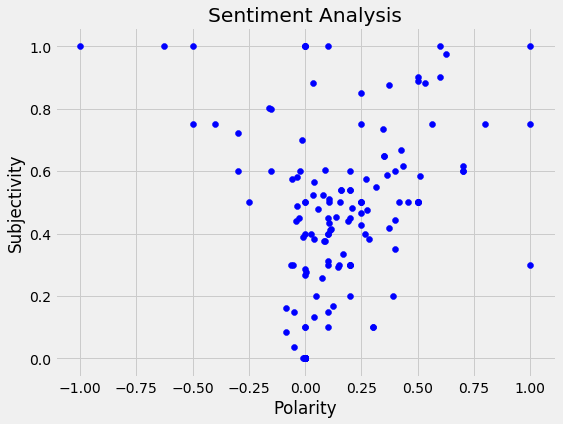

In [0]:
#plot the polarity and subjectivity
plt.figure(figsize= (8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color= 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [0]:
#get the percentage of postive tweets
ptweets= df[df.Analysis== 'Positive']
ptweets= ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

47.0

In [0]:
#get the percentage of negative tweets
ntweets= df[df.Analysis== 'Negative']
ntweets= ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100, 1)

13.0

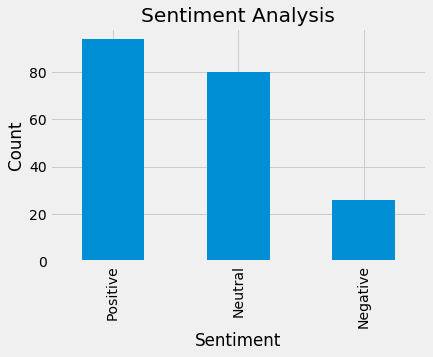

In [0]:
#Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind= 'bar')
plt.show()